# Importing The required Libraries

In [1]:
# Imporing Pandas Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Normaliztion

In [2]:
#Simple Normaliztion 
def Normaliztion(x):
    X_normal = x
    M = np.zeros((1,2))
    S = np.zeros((1,2))
    #convert the x features into numpy matrix
    newx = np.matrix(x)
    # find the mean and the standard diviation of the features
    M = newx.mean(0)
    S = newx.std(0)
    X_normal =  np.divide(np.subtract(x , M), S)
    return X_normal , M , S




# Cost Function

In [3]:
#Computer the Cost Function
def ComputeCostFunction(x, y, theta):
    m = len(y)
    cost = 0
    error = 0
    i = 0
    while(i < m):
        newt = np.transpose(theta)
        newx = np.transpose(x[i])
        multi = np.matmul(newt,newx)
        pwr = np.power(multi-y.iloc[[i],:],2)
        error = error + pwr
        i = i + 1
    cost = error / (2*m)
    return cost

# Gradient Descent Function

In [4]:
#Gradient Descent Function
def Gradient_Descent(X,Y,theta,alpha,iterations):
    m = len(Y)
    cost_history = np.zeros((iterations,1))
    index = 0
    while(index<iterations):
        hypothesis = np.matmul(X,theta)
        error = np.subtract(hypothesis, Y)
        new_x = np.transpose(X)
        delta = np.matmul(new_x,error)
        theta = np.subtract(theta , np.multiply((alpha/m),delta))
        cost_history[index] = ComputeCostFunction(X,Y,theta)
        index = index+1
    return theta , cost_history


# Main

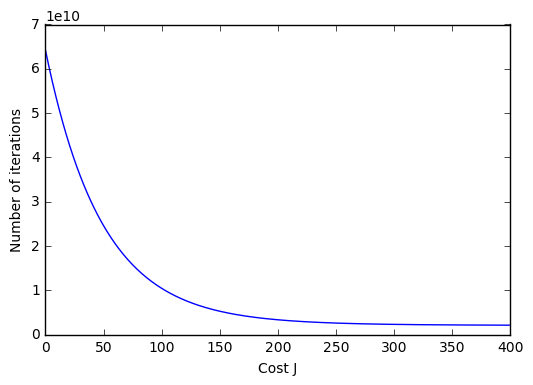

In [5]:
def main():
    # importing Data from drive
    dataset =  pd.read_csv('MLD.csv',delimiter=',')
    
    # seperate dependent and independent features
    X = dataset.iloc[:,0:-1]
    Y = dataset.iloc[:,[2]]
    Y_len = len(Y) 
    # initialize the mean and std matrix
    MEAN = np.zeros((1,2))
    STD  = np.zeros((1,2))
    #call the method Normaliztion and gets the new dependent features
    X, MEAN, STD = Normaliztion(X)
    # add one's column in the features
    X = np.hstack((np.ones((Y_len,1)),X))
    #set alpha's value
    alpha = 0.01
    #set number of iterations 
    iterations = 400
    #initialize theta and cost function
    theta = np.zeros((3,1))
    cost_function = np.zeros((iterations,1))
    # run Gradient Descent 
    theta , cost_function = Gradient_Descent(X,Y,theta,alpha,iterations)
    # Plot Cost Function 
    plt.plot(cost_function)
    plt.ylabel('Number of iterations')
    plt.xlabel('Cost J')
    plt.show()
    # Predit the house price of 1650 sq feet with 3 bed rooms
    x = np.array([1, 1650, 3])
    price = np.matmul(np.transpose(theta),x)
#main Call
main()
